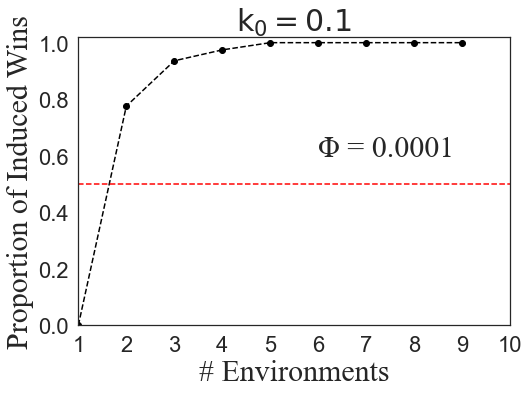

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator


#Import fitness values for blue cells (Constitutive defense has a higher fitness than induction)
Constitutive_Wins = pd.read_csv('Constitutive_Wins.csv',index_col = False)
Induced_loses     = pd.read_csv('Induced_loses.csv',index_col = False)

#Number of environments where constitutive defense outperforms induction
Environment_range = range(1,Constitutive_Wins.shape[1]+1)
ints = range(1,Constitutive_Wins.shape[1]+1)

#Name of environments defined by characters: 1,....,N
Name_Environments = [str(int) for int in ints]


#Vector for the relative fitness
Finduced_Fconstitutive = np.zeros(10000)

#Relative fitness for inhabiting multiple environments
Finduced_Fconstitutive_Es =  np.zeros((len(Finduced_Fconstitutive),len(Name_Environments)))

for z in range(len(Environment_range)):
    
    #Choose the number of environments
    nsample = Environment_range[z]
    
    #Calculate the relative fitness 10,000 times 
    for j in range(10000):
        
        #choose n number of environments
        sample_taken = random.sample(Name_Environments, nsample)
        
        #Vector of sum of fitness values for the constitutive defense
        sum_constitutive = np.zeros(len(Constitutive_Wins))
        
        #For summing fitness values for the induced defense
        sum_Induced      = 0
        
        #sum fitness values across the chosen environments
        for i in range(nsample):
            
            sum_constitutive = Constitutive_Wins[sample_taken[i]].to_numpy() + sum_constitutive
            
            sum_Induced      = np.mean(Induced_loses[sample_taken[i]]) + sum_Induced
            
        #Calculate the average and find the highest fitness for the constitutive defense  
        
        constitutive_fitness = (1/nsample)*max(sum_constitutive)
        
        #Calculate the average for induction 
        
        Induced_fitness = (1/nsample)*sum_Induced
        
        Finduced_Fconstitutive[j] = Induced_fitness - constitutive_fitness
    Finduced_Fconstitutive_Es[:,z] = Finduced_Fconstitutive 
    
    
#Get the values for the Y-axis

Dframe =pd.DataFrame(data=Finduced_Fconstitutive_Es)

Yaxis = np.zeros(Dframe.shape[1])

for i in range(Dframe.shape[1]):
    Yaxis[i]  = np.sum(Dframe[i] > 0, axis=0) /10000
    
Yaxis = Yaxis


#Plot the results

from matplotlib.ticker import MaxNLocator

font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 30,
        }

sns.set(font_scale = 2)
sns.set_style("white")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlim(1, Dframe.shape[1])
ax.plot(np.arange(1,Dframe.shape[1]+1,1),Yaxis, color = 'black',linestyle='dashed', marker='o') 
ax.set_xlabel("# Environments",font)
ax.set_ylim(0,1.019)
ax.set_xticks(np.arange(1,11,1))
ax.set_title(r'$\rm k_{0} = 0.1$',font);
ax.axhline(0.5, linestyle='--', color = 'red')
ax.annotate('Φ = 0.0001',xy=(6,0.6),size = 30, family = 'Times New Roman')
ax.set_ylabel("Proportion of Induced Wins",font);



        